<a href="https://colab.research.google.com/github/mart1428/AFibPredictor/blob/main/AFib_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atrial Fibrillation Detector**
---

The purpose of this project is to predict if a person has a high chance in getting Atrial Fibrillation based on bloodworks. This is due to Atrial Fibrillation being a hard to detect and is usually detected when doing checkups.

###**From Kaggle:**
Content
Using Structured Query Language queries (PostgreSQL, version 9.6), demographic characteristics, vital signs, and laboratory values data were extracted from the following tables in the MIMIC III dataset: ADMISSIONS, PATIENTS, ICUSTAYS, D_ICD DIAGNOSIS, DIAGNOSIS_ICD, LABEVENTS, D_LABIEVENTS, CHARTEVENTS, D_ITEMS, NOTEEVENTS, and OUTPUTEVENTS. Based on previous studies 7-9 13-15, clinical relevance, and general availability at the time of presentation, we extracted the following data: demographic characteristics (age at the time of hospital admission, sex, ethnicity, weight, and height); vital signs (heart rate, (HR), systolic blood pressure [SBP], diastolic blood pressure [DBP], mean blood pressure, respiratory rate, body temperature, saturation pulse oxygen [SPO2], urine output [first 24 h]); comorbidities (hypertension, atrial fibrillation, ischemic heart disease, diabetes mellitus, depression, hypoferric anemia, hyperlipidemia, chronic kidney disease (CKD), and chronic obstructive pulmonary disease [COPD]); and laboratory variables (hematocrit, red blood cells, mean corpuscular hemoglobin [MCH], mean corpuscular hemoglobin concentration [MCHC], mean corpuscular volume [MCV], red blood cell distribution width [RDW], platelet count, white blood cells, neutrophils, basophils, lymphocytes, prothrombin time [PT], international normalized ratio [INR], NT-proBNP, creatine kinase, creatinine, blood urea nitrogen [BUN] glucose, potassium, sodium, calcium, chloride, magnesium, the anion gap, bicarbonate, lactate, hydrogen ion concentration [pH], partial pressure of CO2 in arterial blood, and LVEF), using Structured Query Language (SQL) with PostgreSQL (version 9.6). Demographic characteristics and vital signs extracted were recorded during the ﬁrst 24 hours of each admission and laboratory variables were measured during the entire ICU stay. Comorbidities were identified using ICD-9 codes. For variable data with multiple measurements, the calculated mean value was included for analysis.

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [ ]:
data = pd.read_csv("https://docs.google.com/uc?export=download&id=1v7z6Lk0T4r7p58a-0PSUsjkcyecwe9X9")
print(data.head())

   group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.1625

In [ ]:
data.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [ ]:
data.dtypes

group                         int64
ID                            int64
outcome                     float64
age                           int64
gendera                       int64
BMI                         float64
hypertensive                  int64
atrialfibrillation            int64
CHD with no MI                int64
diabetes                      int64
deficiencyanemias             int64
depression                    int64
Hyperlipemia                  int64
Renal failure                 int64
COPD                          int64
heart rate                  float64
Systolic blood pressure     float64
Diastolic blood pressure    float64
Respiratory rate            float64
temperature                 float64
SP O2                       float64
Urine output                float64
hematocrit                  float64
RBC                         float64
MCH                         float64
MCHC                        float64
MCV                         float64
RDW                         

In [ ]:
data.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [ ]:
imputer = SimpleImputer(strategy = 'most_frequent')
cols = data.columns
data[cols] = imputer.fit_transform(data[cols])
data.isnull().sum()

group                       0
ID                          0
outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT        

In [ ]:
drop_data_cols = ['group', 'ID', 'outcome',  'gendera',  'hypertensive', 'Urine output', 'temperature',
        'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD']
processed_data = data.drop(columns = drop_data_cols)

Index(['age', 'BMI', 'atrialfibrillation', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'SP O2', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV',
       'RDW', 'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils',
       'Lymphocyte', 'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF'],
      dtype='object')


<Axes: >

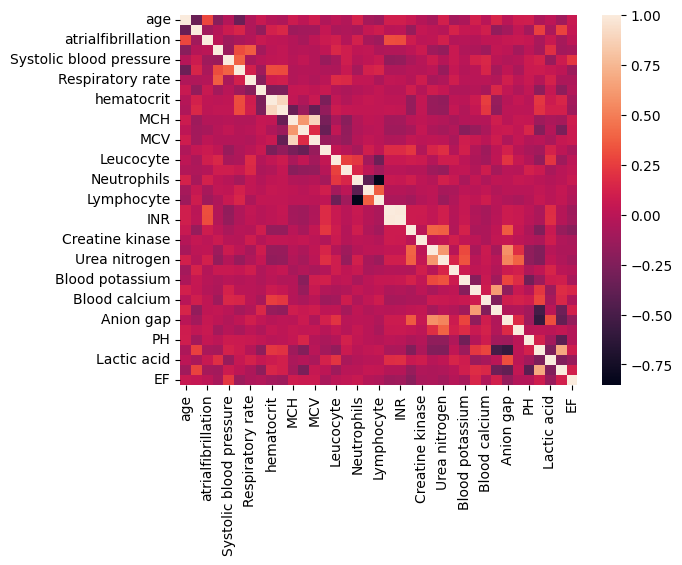

In [ ]:
print(processed_data.columns)
corrs = processed_data.corr()
sns.heatmap(corrs)

In [ ]:
corrs[['atrialfibrillation']].abs().sort_values('atrialfibrillation', ascending = False)

,atrialfibrillation
atrialfibrillation,1.000000
PT,0.316861
INR,0.310939
age,0.291003
Lymphocyte,0.118046
Systolic blood pressure,0.116720
Neutrophils,0.114078
BMI,0.111744
Urea nitrogen,0.108165
Leucocyte,0.098511


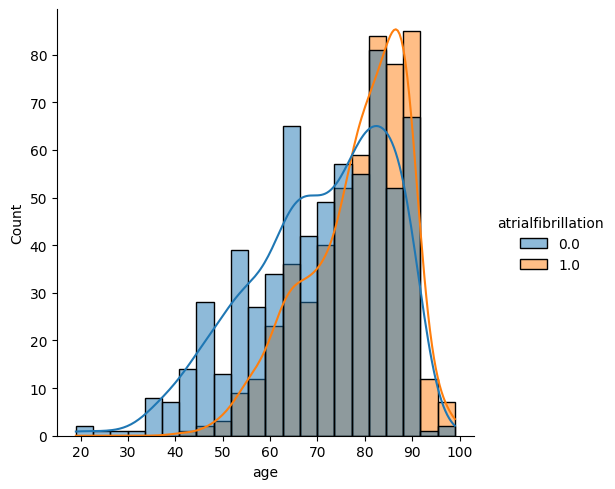

In [ ]:
sns.displot(data=data, x = 'age', hue = 'atrialfibrillation', kde = True)

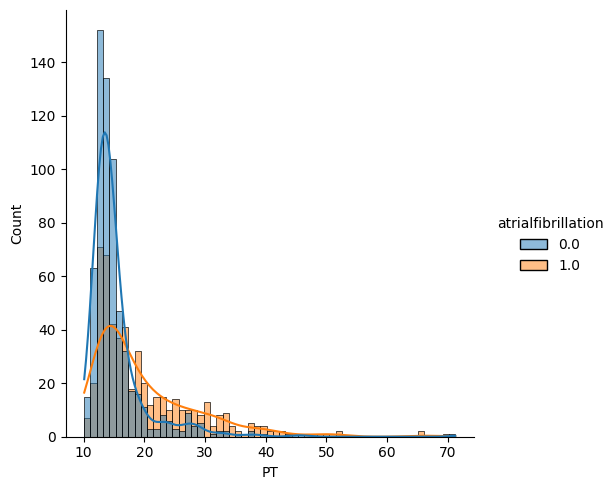

In [ ]:
sns.displot(data=data, x = 'PT', hue = 'atrialfibrillation', kde = True)

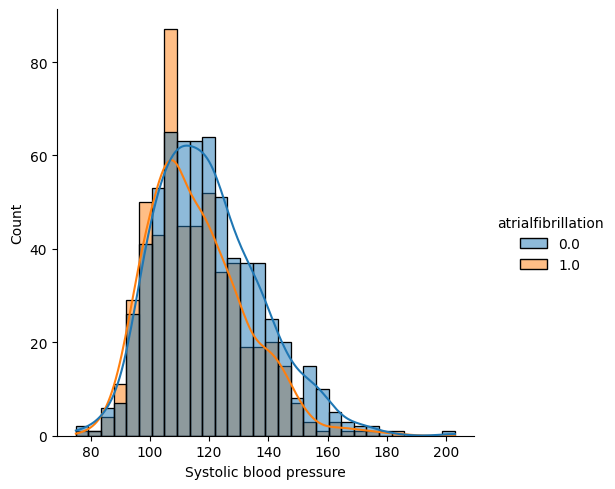

In [ ]:
sns.displot(data=data, x = 'Systolic blood pressure', hue = 'atrialfibrillation', kde = True)

---
##**First Iteration**
---

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(processed_data.drop('atrialfibrillation', axis = 1), processed_data.atrialfibrillation, test_size = 0.2, random_state = 1000, stratify = processed_data.atrialfibrillation)
X_train.shape, y_train.shape

((941, 36), (941,))

In [ ]:
logreg = sklearn.linear_model.LogisticRegressionCV(max_iter = 5000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logreg.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logreg.score(X_test, y_test)}')

Logistic Regression Training Score: 0.696068012752391
Logistic Regression Testing Score: 0.7076271186440678


In [ ]:
betas = pd.Series(logreg.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logreg.intercept_[0]})])
betas.sort_values()

Respiratory rate           -2.650822e-02
MCHC                       -2.050912e-02
Blood sodium               -1.669965e-02
Chloride                   -1.515472e-02
SP O2                      -1.184303e-02
Systolic blood pressure    -1.138362e-02
PCO2                       -1.120596e-02
MCH                        -1.065523e-02
Lymphocyte                 -9.513852e-03
Anion gap                  -7.266851e-03
Blood potassium            -4.016739e-03
Basophils                  -3.107299e-03
Lactic acid                -2.992217e-03
PH                         -1.519847e-03
BMI                        -1.489212e-03
Neutrophils                -1.155944e-03
RBC                        -8.298286e-04
Platelets                  -7.422269e-04
glucose                    -4.179051e-04
Intercept                  -4.089643e-04
Creatine kinase            -1.004589e-05
NT-proBNP                   6.539536e-07
Creatinine                  7.102560e-04
Magnesium ion               7.987071e-04
Bicarbonate     

In [ ]:
logregl1 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l1', solver = 'saga', max_iter = 10000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logregl1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logregl1.score(X_test, y_test)}')

Logistic Regression Training Score: 0.5844845908607864
Logistic Regression Testing Score: 0.6313559322033898


In [ ]:
betas = pd.Series(logregl1.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logregl1.intercept_[0]})])
betas.sort_values()

Systolic blood pressure    -3.421488e-03
PCO2                       -1.273608e-03
Diastolic blood pressure   -1.090364e-03
glucose                    -9.610005e-04
Lymphocyte                 -8.820824e-04
BMI                        -8.670318e-04
Platelets                  -5.648292e-04
Blood sodium               -4.339210e-04
heart rate                 -1.427934e-04
SP O2                      -1.206152e-04
Bicarbonate                -1.191815e-04
MCV                        -1.175148e-04
Chloride                   -9.683755e-05
MCHC                       -7.541424e-05
Respiratory rate           -7.270744e-05
MCH                        -5.308070e-05
Intercept                  -2.682026e-05
Blood potassium             0.000000e+00
PH                          0.000000e+00
Magnesium ion               0.000000e+00
Anion gap                   0.000000e+00
RBC                         0.000000e+00
Creatinine                  0.000000e+00
Blood calcium               0.000000e+00
RDW             

In [ ]:
logregl2 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l2', solver = 'saga', max_iter = 10000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logregl1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logregl1.score(X_test, y_test)}')

Logistic Regression Training Score: 0.5844845908607864
Logistic Regression Testing Score: 0.6313559322033898


In [ ]:
betas = pd.Series(logregl2.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logregl2.intercept_[0]})])
betas.sort_values()

Systolic blood pressure    -0.003051
PCO2                       -0.001580
Diastolic blood pressure   -0.001386
Lymphocyte                 -0.001291
BMI                        -0.001267
glucose                    -0.000963
Blood sodium               -0.000624
Platelets                  -0.000571
Bicarbonate                -0.000485
Respiratory rate           -0.000311
SP O2                      -0.000304
MCHC                       -0.000300
Chloride                   -0.000286
MCH                        -0.000218
MCV                        -0.000207
heart rate                 -0.000179
Basophils                  -0.000057
Blood potassium            -0.000049
Creatinine                 -0.000033
PH                         -0.000025
Intercept                  -0.000004
RBC                         0.000004
NT-proBNP                   0.000008
Creatine kinase             0.000017
Magnesium ion               0.000023
Blood calcium               0.000037
RDW                         0.000060
A

---
##**Second Iteration**
---

In [ ]:
drop_data_cols = ['group', 'ID', 'outcome',  'gendera',  'hypertensive', 'Urine output', 'temperature','Magnesium ion','PH', 'glucose',
        'CHD with no MI', 'diabetes', 'deficiencyanemias', 'Blood potassium', 'Anion gap','RBC', 'Blood calcium','Creatinine','RDW','Basophils', 'NT-proBNP', 'Creatine kinase', 'BMI', 'Platelets', 'Neutrophils',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD']
processed_data = data.drop(columns = drop_data_cols)

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(processed_data.drop('atrialfibrillation', axis = 1), processed_data.atrialfibrillation, test_size = 0.2, random_state = 1000, stratify = processed_data.atrialfibrillation)
X_train.shape, y_train.shape

((941, 21), (941,))

In [ ]:
logreg = sklearn.linear_model.LogisticRegressionCV(max_iter = 5000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logreg.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logreg.score(X_test, y_test)}')

Logistic Regression Training Score: 0.7024442082890542
Logistic Regression Testing Score: 0.7033898305084746


In [ ]:
betas = pd.Series(logreg.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logreg.intercept_[0]})])
betas.sort_values()

Intercept                  -2.492768
Respiratory rate           -0.029327
MCHC                       -0.023141
MCH                        -0.012755
Chloride                   -0.012414
Systolic blood pressure    -0.012216
Blood sodium               -0.012045
PCO2                       -0.011816
Lymphocyte                 -0.007643
Lactic acid                -0.006632
SP O2                      -0.003068
Bicarbonate                 0.003301
heart rate                  0.005996
hematocrit                  0.006976
MCV                         0.008040
INR                         0.008306
Urea nitrogen               0.008354
Diastolic blood pressure    0.016029
EF                          0.016917
Leucocyte                   0.019985
age                         0.053481
PT                          0.088130
dtype: float64

In [ ]:
logregl1 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l1', solver = 'saga', max_iter = 10000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logregl1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logregl1.score(X_test, y_test)}')

Logistic Regression Training Score: 0.7056323060573858
Logistic Regression Testing Score: 0.690677966101695


In [ ]:
betas = pd.Series(logregl1.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logregl1.intercept_[0]})])
betas.sort_values()

Intercept                  -0.245965
MCHC                       -0.069622
Respiratory rate           -0.037826
Blood sodium               -0.015301
Chloride                   -0.014894
PCO2                       -0.011851
Systolic blood pressure    -0.011836
Lymphocyte                 -0.006808
SP O2                      -0.005129
INR                         0.000000
Lactic acid                 0.000000
Bicarbonate                 0.000000
MCH                         0.000000
hematocrit                  0.002432
MCV                         0.003514
heart rate                  0.005810
Urea nitrogen               0.007630
Diastolic blood pressure    0.017339
EF                          0.017860
Leucocyte                   0.021578
age                         0.056246
PT                          0.104113
dtype: float64

In [ ]:
logregl2 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l2', solver = 'saga', max_iter = 10000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logregl1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logregl1.score(X_test, y_test)}')

Logistic Regression Training Score: 0.7056323060573858
Logistic Regression Testing Score: 0.690677966101695


In [ ]:
betas = pd.Series(logregl2.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logregl2.intercept_[0]})])
betas.sort_values()

MCHC                       -0.074100
Respiratory rate           -0.046143
Lactic acid                -0.041393
MCH                        -0.024863
Chloride                   -0.016876
PCO2                       -0.016089
Blood sodium               -0.015593
Systolic blood pressure    -0.012380
SP O2                      -0.011761
Lymphocyte                 -0.007443
Intercept                  -0.004651
INR                         0.002153
Bicarbonate                 0.003792
heart rate                  0.007060
hematocrit                  0.007274
Urea nitrogen               0.008217
MCV                         0.017186
Diastolic blood pressure    0.019041
EF                          0.019522
Leucocyte                   0.027811
age                         0.057908
PT                          0.106370
dtype: float64

---
##**Third Iteration**
---

In [ ]:
drop_data_cols = ['group', 'ID', 'outcome',  'gendera',  'hypertensive', 'Urine output', 'temperature','Magnesium ion','PH', 'glucose', 'INR', 'Lactic acid', 'Bicarbonate', 'MCH',
        'CHD with no MI', 'diabetes', 'deficiencyanemias', 'Blood potassium', 'Anion gap','RBC', 'Blood calcium','Creatinine','RDW','Basophils', 'NT-proBNP', 'Creatine kinase', 'BMI', 'Platelets', 'Neutrophils',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD']
processed_data = data.drop(columns = drop_data_cols)

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(processed_data.drop('atrialfibrillation', axis = 1), processed_data.atrialfibrillation, test_size = 0.2, random_state = 1000, stratify = processed_data.atrialfibrillation)
X_train.shape, y_train.shape

((941, 17), (941,))

In [ ]:
logreg = sklearn.linear_model.LogisticRegressionCV(max_iter = 5000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logreg.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logreg.score(X_test, y_test)}')

Logistic Regression Training Score: 0.7013815090329437
Logistic Regression Testing Score: 0.711864406779661


In [ ]:
betas = pd.Series(logreg.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logreg.intercept_[0]})])
betas.sort_values()

Intercept                  -1.905877
MCHC                       -0.111452
Respiratory rate           -0.048159
Chloride                   -0.023770
PCO2                       -0.015836
Systolic blood pressure    -0.012159
Lymphocyte                 -0.007715
Blood sodium               -0.002959
SP O2                       0.003866
heart rate                  0.007456
hematocrit                  0.008019
Urea nitrogen               0.008043
MCV                         0.012910
Diastolic blood pressure    0.019817
EF                          0.020309
Leucocyte                   0.028328
age                         0.058781
PT                          0.109860
dtype: float64

In [ ]:
logregl1 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l1', solver = 'saga', max_iter = 10000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logregl1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logregl1.score(X_test, y_test)}')

Logistic Regression Training Score: 0.7056323060573858
Logistic Regression Testing Score: 0.690677966101695


In [ ]:
betas = pd.Series(logregl1.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logregl1.intercept_[0]})])
betas.sort_values()

Intercept                  -0.192297
MCHC                       -0.069915
Respiratory rate           -0.037859
Blood sodium               -0.015434
Chloride                   -0.014854
PCO2                       -0.011862
Systolic blood pressure    -0.011836
Lymphocyte                 -0.006809
SP O2                      -0.005392
hematocrit                  0.002407
MCV                         0.003503
heart rate                  0.005801
Urea nitrogen               0.007626
Diastolic blood pressure    0.017334
EF                          0.017860
Leucocyte                   0.021577
age                         0.056243
PT                          0.104100
dtype: float64

In [ ]:
logregl2 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l2', solver = 'saga', max_iter = 10000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logregl1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logregl1.score(X_test, y_test)}')

Logistic Regression Training Score: 0.7056323060573858
Logistic Regression Testing Score: 0.690677966101695


In [ ]:
betas = pd.Series(logregl2.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logregl2.intercept_[0]})])
betas.sort_values()

MCHC                       -0.085592
Respiratory rate           -0.046372
Chloride                   -0.019765
PCO2                       -0.014461
Systolic blood pressure    -0.012230
Blood sodium               -0.011209
SP O2                      -0.011083
Lymphocyte                 -0.007693
Intercept                  -0.003952
hematocrit                  0.006671
heart rate                  0.006918
Urea nitrogen               0.008046
MCV                         0.009236
Diastolic blood pressure    0.018962
EF                          0.019501
Leucocyte                   0.026309
age                         0.057786
PT                          0.106229
dtype: float64

---
##**Fourth Iteration**
---

In [ ]:
drop_data_cols = ['group', 'ID', 'outcome',  'gendera',  'hypertensive', 'Urine output', 'temperature','Magnesium ion','PH', 'glucose', 'INR', 'Lactic acid', 'Bicarbonate', 'MCH', 'hematocrit', 'heart rate', 'Urea nitrogen', 'SP O2',
        'CHD with no MI', 'diabetes', 'deficiencyanemias', 'Blood potassium', 'Anion gap','RBC', 'Blood calcium','Creatinine','RDW','Basophils', 'NT-proBNP', 'Creatine kinase', 'BMI', 'Platelets', 'Neutrophils',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'Blood sodium']
processed_data = data.drop(columns = drop_data_cols)

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(processed_data.drop('atrialfibrillation', axis = 1), processed_data.atrialfibrillation, test_size = 0.2, random_state = 1000, stratify = processed_data.atrialfibrillation)
X_train.shape, y_train.shape

((941, 12), (941,))

In [ ]:
logreg = sklearn.linear_model.LogisticRegressionCV(max_iter = 5000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logreg.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logreg.score(X_test, y_test)}')

Logistic Regression Training Score: 0.7098831030818279
Logistic Regression Testing Score: 0.711864406779661


In [ ]:
betas = pd.Series(logreg.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logreg.intercept_[0]})])
betas.sort_values()

Intercept                  -2.380937
MCHC                       -0.078619
Respiratory rate           -0.036866
Chloride                   -0.020048
PCO2                       -0.014018
Systolic blood pressure    -0.013666
Lymphocyte                 -0.010943
MCV                         0.013230
EF                          0.017756
Diastolic blood pressure    0.022735
Leucocyte                   0.032777
age                         0.058362
PT                          0.107406
dtype: float64

In [ ]:
logregl1 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l1', solver = 'saga', max_iter = 10000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logregl1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logregl1.score(X_test, y_test)}')

Logistic Regression Training Score: 0.7151965993623804
Logistic Regression Testing Score: 0.711864406779661


In [ ]:
betas = pd.Series(logregl1.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logregl1.intercept_[0]})])
betas.sort_values()

Intercept                  -0.332662
MCHC                       -0.131917
Respiratory rate           -0.041263
Chloride                   -0.024270
PCO2                       -0.017155
Systolic blood pressure    -0.013676
Lymphocyte                 -0.010999
MCV                         0.015608
EF                          0.018759
Diastolic blood pressure    0.022866
Leucocyte                   0.034614
age                         0.058863
PT                          0.109941
dtype: float64

In [ ]:
logregl2 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l2', solver = 'saga', max_iter = 10000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logregl1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logregl1.score(X_test, y_test)}')

Logistic Regression Training Score: 0.7151965993623804
Logistic Regression Testing Score: 0.711864406779661


In [ ]:
betas = pd.Series(logregl2.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logregl2.intercept_[0]})])
betas.sort_values()

MCHC                       -0.136396
Respiratory rate           -0.041903
Chloride                   -0.025333
PCO2                       -0.017631
Systolic blood pressure    -0.013724
Lymphocyte                 -0.011045
Intercept                  -0.007256
MCV                         0.015473
EF                          0.018828
Diastolic blood pressure    0.022728
Leucocyte                   0.034642
age                         0.058759
PT                          0.109721
dtype: float64

In [ ]:
import sklearn.ensemble

y_train.replace({1:-1}, inplace = True)
y_train.replace({0:1}, inplace = True)
y_train


107    1.0
887    1.0
588    1.0
188    1.0
585    1.0
      ... 
986   -1.0
592    1.0
496   -1.0
678    1.0
122    1.0
Name: atrialfibrillation, Length: 941, dtype: float64

In [ ]:
isolation_forest = sklearn.ensemble.IsolationForest(contamination = 0.15).fit(X_train)
y_pred = pd.Series(isolation_forest.predict(X_train))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# print((y_train.reset_index()), (y_pred.reindex()))
a = y_pred
b = y_train.reset_index()
print(b)
c = (a == b['atrialfibrillation']).astype(int).sum()
print(c/len(b   ))

# print(f'Isolated Forest Training Score: {isolation_forest.predict(X_train)}')

     index  atrialfibrillation
0      107                 1.0
1      887                 1.0
2      588                 1.0
3      188                 1.0
4      585                 1.0
..     ...                 ...
936    986                -1.0
937    592                 1.0
938    496                -1.0
939    678                 1.0
940    122                 1.0

[941 rows x 2 columns]
0.5281615302869288
